# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I am using the Adult Census Income dataset.
2. I will be predicting whether a person's annual income is over `$50K` or not. The label is the income_binary column.
3. This is a supervised learning problem because we are training on labeled data, where the label is the income. It is also a binary classification problem because the output has only two classes: high income `(>$50K)` or low income `(<=$50K)`.
4. I plan to use all of the columns in the dataset except for the label (binary_income) as features. These include a mix of numerical features (age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week) and categorical features (workclass, education, marital-status, occupation, relationship, race, sex, native-country). After exploring the data, I may remove some features that I find irrelevant or redundant, which I suspect "education-num" and "education" are.
5. Predicting income information can help businesses better segment customers, target marketing, or adjust pricing. By inferring a customer's income range, for example, they can tailor ads to recommend products or service plans that are more likely align with their budget, increasing appeal and overall sales. Credit card and loan companies might also use income information when making lending decisions, although I feel like they would more likely gather this income information directly from applications rather than predicting it from other data.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# inspect column names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')

In [4]:
# rename certain categories
df.rename(columns={"sex_selfID": "sex", "fnlwgt": "population-weight", "income_binary": "income_>50K"}, inplace=True)
df.columns

Index(['age', 'workclass', 'population-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [5]:
# check for class imbalance of label
income_counts = df['income_>50K'].value_counts()
income_counts

<=50K    24720
>50K      7841
Name: income_>50K, dtype: int64

In [6]:
# check how much of the dataset the minority class makes up
income_counts[1] / (income_counts[0] + income_counts[1])

0.2408095574460244

^ Note: 24% means there IS a class imbalance, but not a super extreme one. I will attempt to account for the imbalance by using class_weight='balanced' when building the models (which weighs the minority class more), or if necessary, resample the data.

In [7]:
# replace income label with binary integer label for easier metric calculations down the line
df["income_>50K"].replace(">50K", 1, inplace=True)
df["income_>50K"].replace("<=50K", 0, inplace=True)
df.head(20)

,age,workclass,population-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,0
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,0
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,0
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,1
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,1
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,1


In [8]:
# observe data types of columns
df.dtypes

age                  float64
workclass             object
population-weight      int64
education             object
education-num          int64
marital-status        object
occupation            object
relationship          object
race                  object
sex                   object
capital-gain           int64
capital-loss           int64
hours-per-week       float64
native-country        object
income_>50K            int64
dtype: object

In [9]:
# analyze statistics of numerical columns
df.describe()

,age,population-weight,education-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000,32561.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428,0.240810
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000,1.000000


^ Note: the features operate on very different scales. Scaling may be needed if we end up working with distance-based models like KNN or NN, but not with tree-based models.

In [10]:
# select numerical features
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
numerical_features = numerical_features.drop("income_>50K")
numerical_features

Index(['age', 'population-weight', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week'],
      dtype='object')

In [11]:
# check for missing values
df.isna().sum()

age                   162
workclass            1836
population-weight       0
education               0
education-num           0
marital-status          0
occupation           1843
relationship            0
race                    0
sex                     0
capital-gain            0
capital-loss            0
hours-per-week        325
native-country        583
income_>50K             0
dtype: int64

In [12]:
# impute missing values for numerical columns using the mean
for col in ['age', 'hours-per-week']:
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)

# check that there are no more missing values for numerical columns
df.isna().sum()

age                     0
workclass            1836
population-weight       0
education               0
education-num           0
marital-status          0
occupation           1843
relationship            0
race                    0
sex                     0
capital-gain            0
capital-loss            0
hours-per-week          0
native-country        583
income_>50K             0
dtype: int64

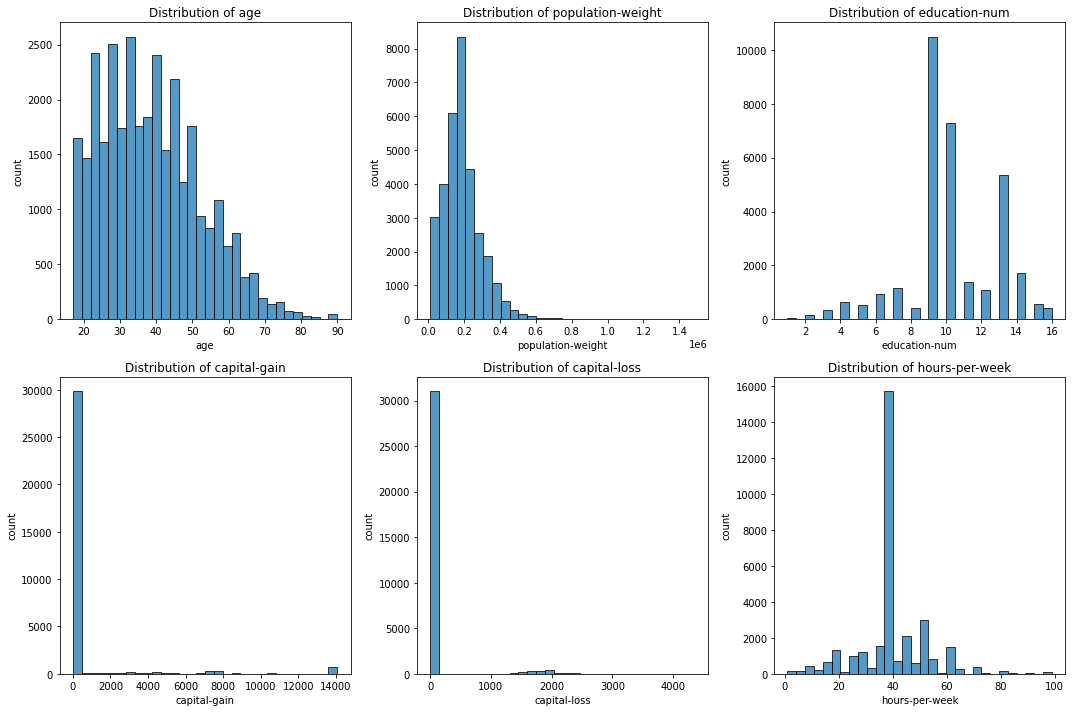

In [13]:
# visualize distribution of numerical features using histograms
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.histplot(x=df[col], bins=30, ax=axes[i])
    axes[i].set_title("Distribution of " + col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('count')

plt.tight_layout()
plt.show()

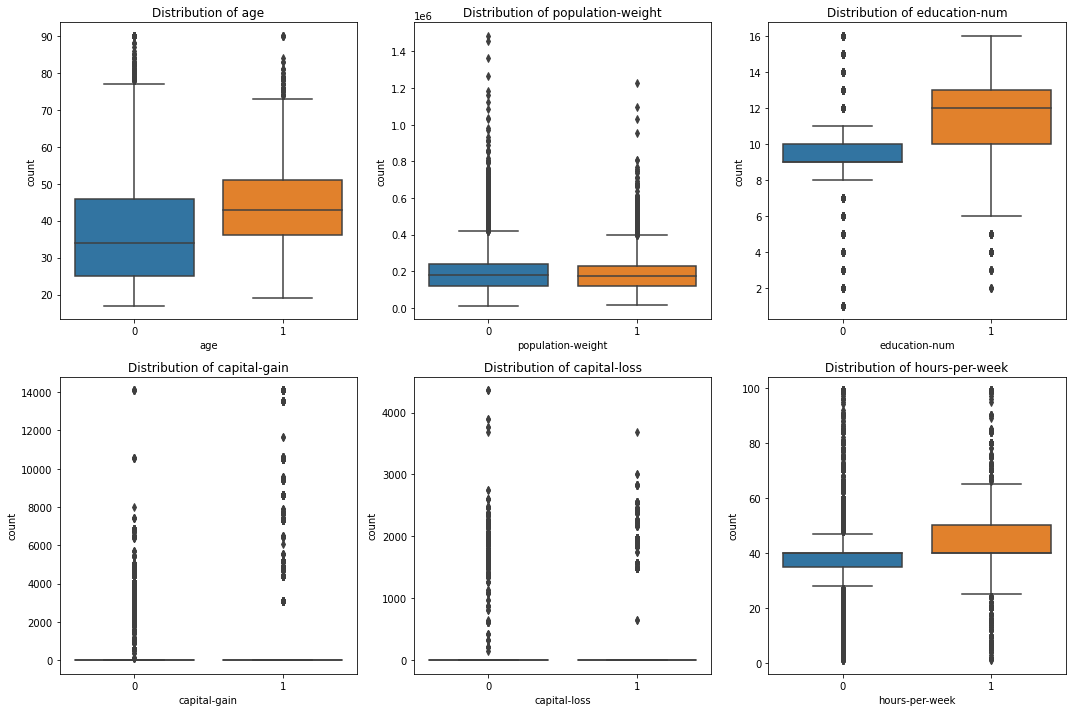

In [14]:
# visualize distribution of numerical features using grouped boxplots
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.boxplot(x="income_>50K", y=col, data=df, ax=axes[i])
    axes[i].set_title("Distribution of " + col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('count')

plt.tight_layout()
plt.show()

^ Note: the boxplot for population-weight shows nearly equal distributions for the two income classes, suggesting that it has little to no predictive power in distinguishing income. This makes logical sense, as population-weight contains sampling weights in the census, which doesn't relate to an individual's income. Thus, I will remove it as a feature for modeling.

In [15]:
# remove population-weight from features and check it worked
numerical_features = numerical_features.drop("population-weight")
df.drop("population-weight", axis=1, inplace=True)
print(numerical_features)
print(df.columns)

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income_>50K'],
      dtype='object')


In [16]:
# winsorize numerical features to take care of outliers
import scipy.stats as stats

for col in numerical_features:
    df[col] = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])

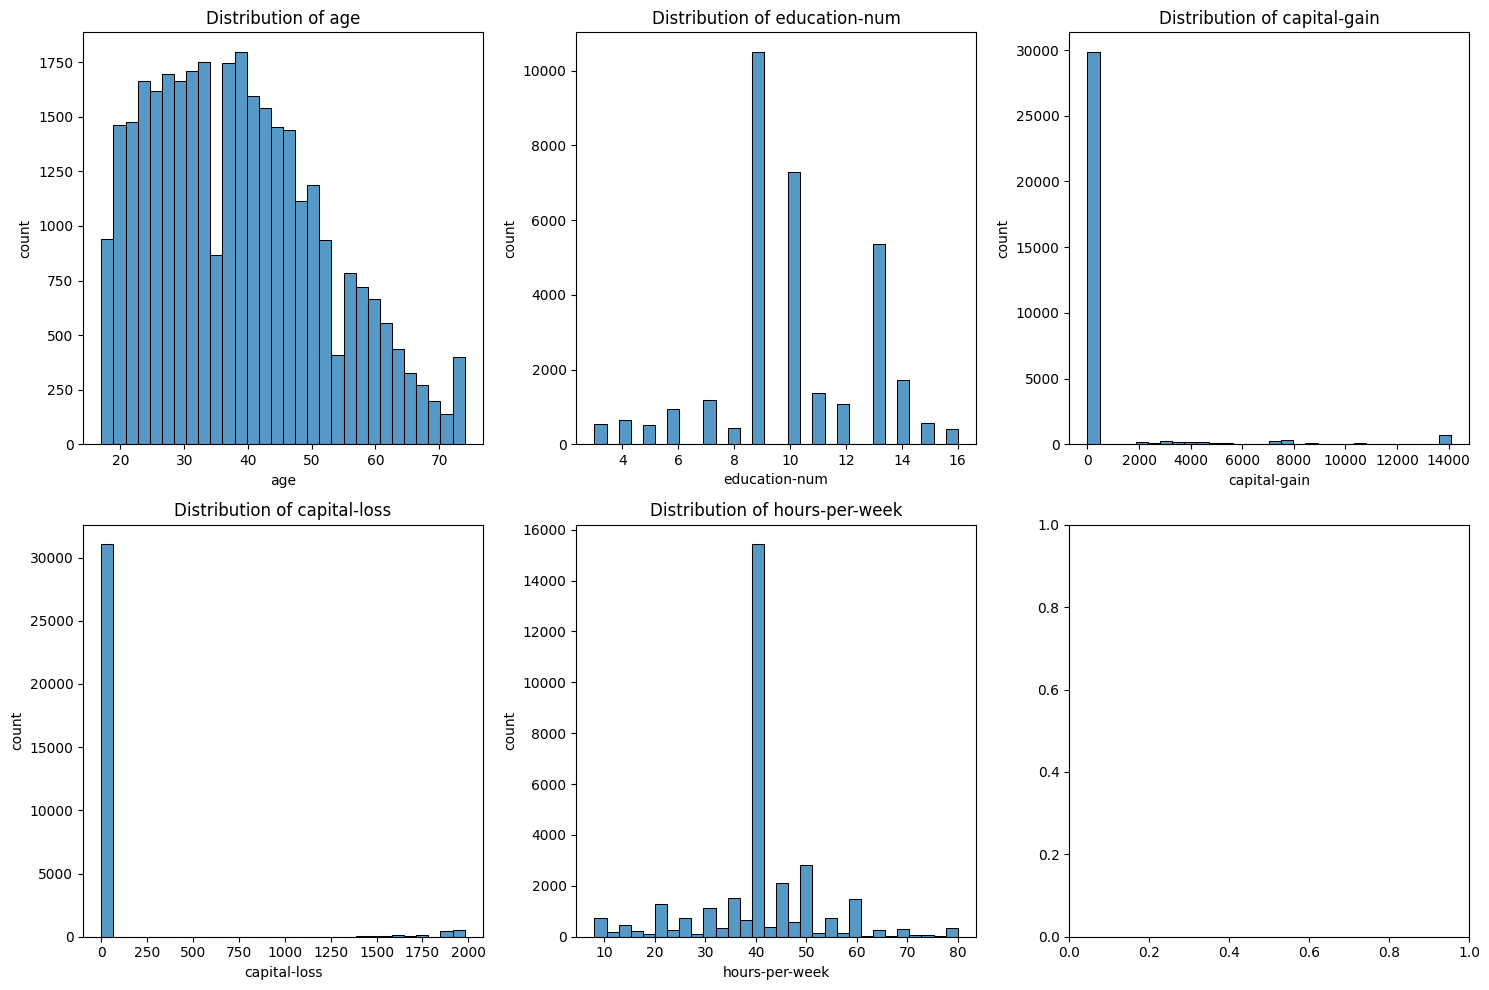

In [17]:
# verify that winsorization successfully removed outliers using histogram visualization
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.histplot(x=df[col], bins=30, ax=axes[i])
    axes[i].set_title("Distribution of " + col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('count')

plt.tight_layout()
plt.show()

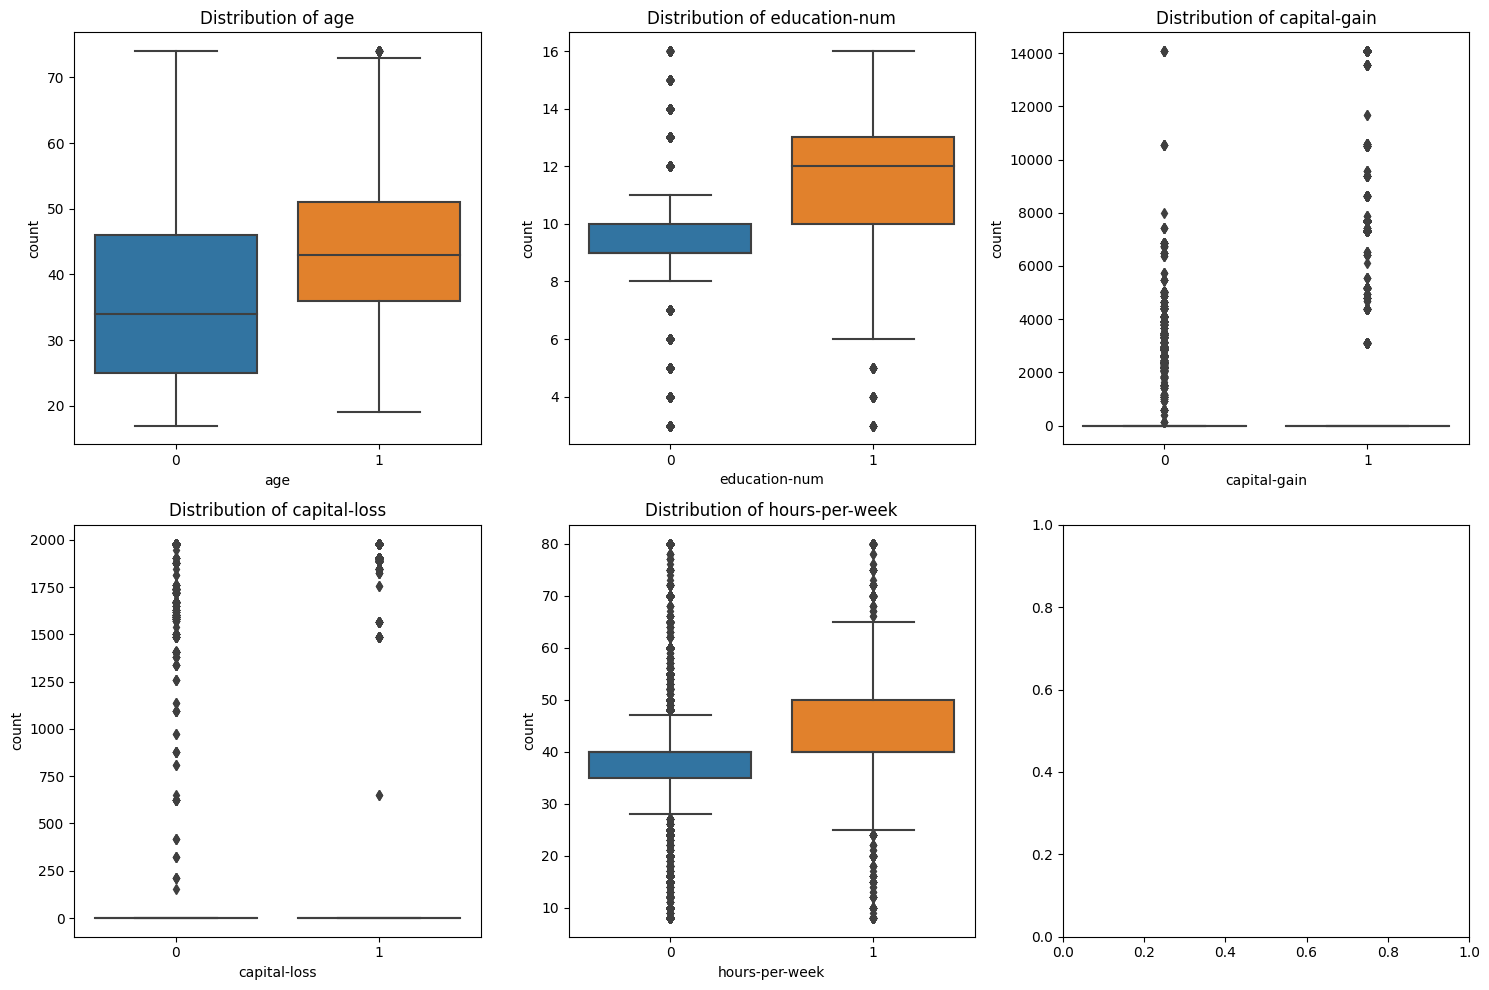

In [18]:
# verify that winsorization successfully removed outliers using grouped box-plot visualization
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.boxplot(x="income_>50K", y=col, data=df, ax=axes[i])
    axes[i].set_title("Distribution of " + col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('count')

plt.tight_layout()
plt.show()

In [19]:
# observe the relationships between numerical features
df[numerical_features].corr()

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.039837,0.125410,0.053632,0.074111
education-num,0.039837,1.000000,0.168202,0.081069,0.151695
capital-gain,0.125410,0.168202,1.000000,-0.055690,0.104152
capital-loss,0.053632,0.081069,-0.055690,1.000000,0.055494
hours-per-week,0.074111,0.151695,0.104152,0.055494,1.000000


^ Note: none of the numerical features are highly-correlated with each other, so none of the numerical features need to be removed due to redundancy with each other.

In [20]:
# select categorical features
categorical_features = df.select_dtypes(include=["object"]).columns
categorical_features

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [21]:
# replace categorical missing values with "missing" category
df['workclass'] = df['workclass'].fillna('missing')
df['occupation'] = df['occupation'].fillna('missing')
df['native-country'] = df['native-country'].fillna('missing')

# check that there are no more null values in the dataset
df.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_>50K       0
dtype: int64

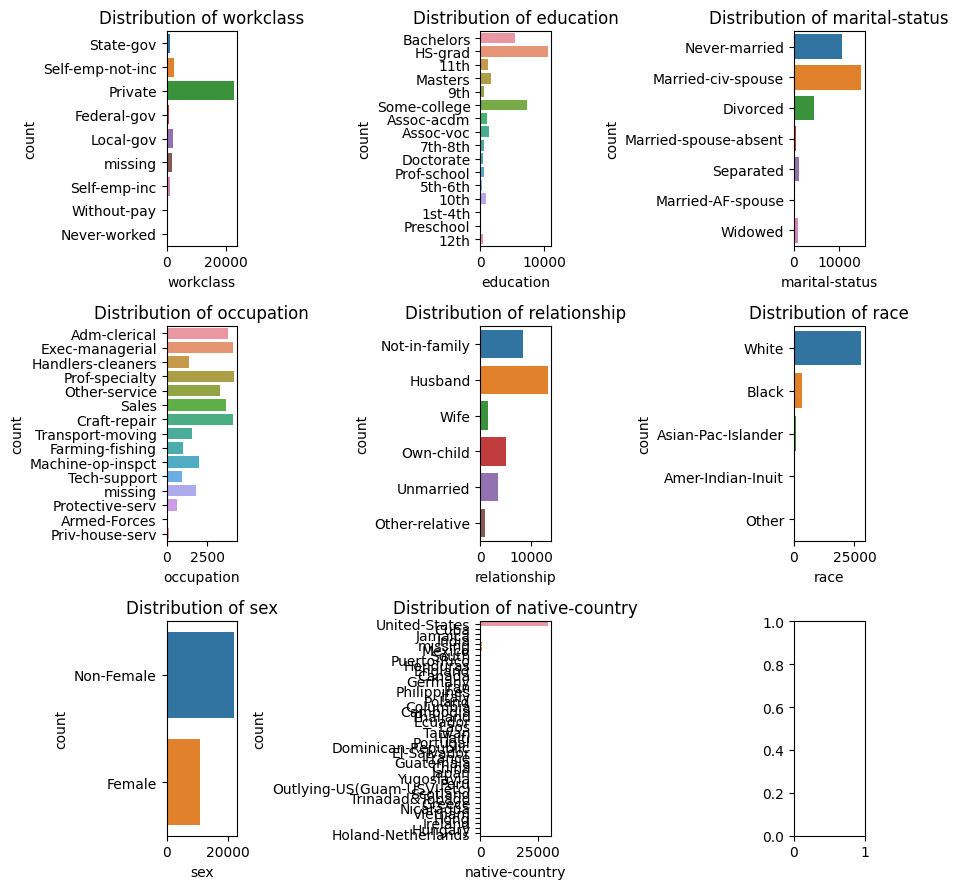

In [22]:
# visualize distribution of categorical features using countplots
fig, axes = plt.subplots(3, 3, figsize=(9,9))
axes = axes.flatten()
for i, col in enumerate(categorical_features):
    sns.countplot(y=df[col], ax=axes[i])
    axes[i].set_title("Distribution of " + col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('count')

plt.tight_layout()
plt.show()

^ Note: the distributions of some of these categories are pretty skewed. I will keep protected subgroups in the sex, race, and native-country categories in mind when evaluating fairness in the model.

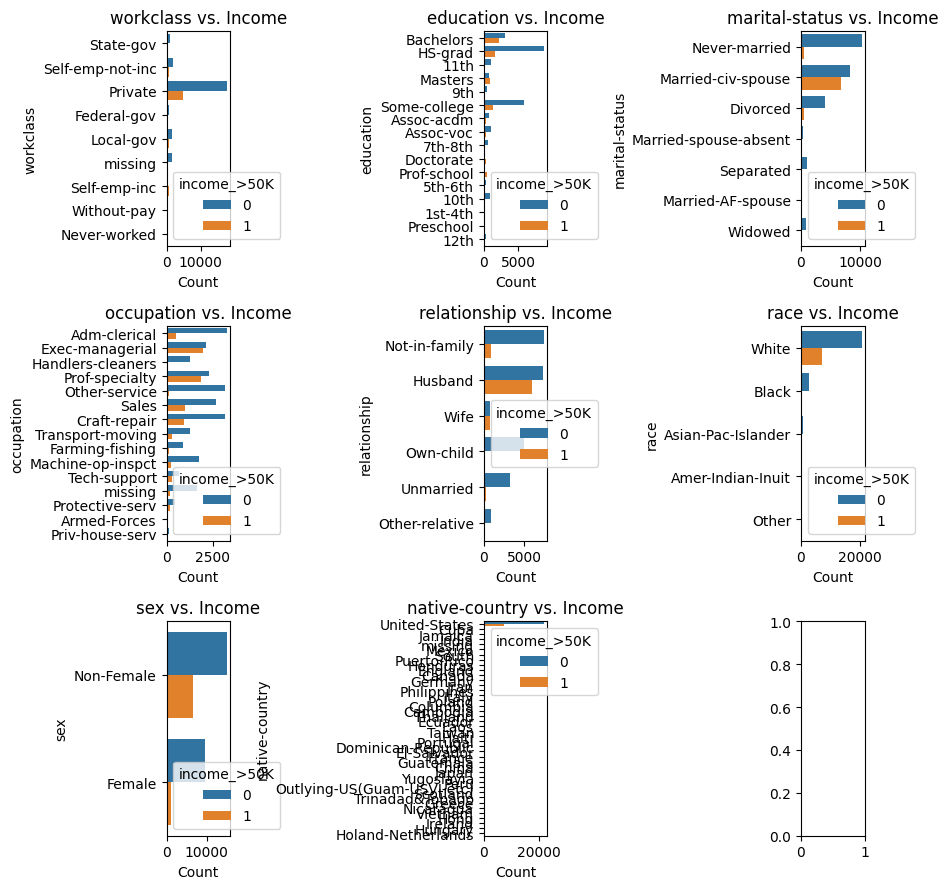

In [23]:
# visualize categorical features vs target using grouped countplots
fig, axes = plt.subplots(3, 3, figsize=(9,9))
axes = axes.flatten()
for i, col in enumerate(categorical_features):
    sns.countplot(y=col, hue='income_>50K', data=df, ax=axes[i])
    axes[i].set_title(col + " vs. Income")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

^ Note: none of the categorical feature distributions are identical or very close to identical between the two income classes (0 and 1). This suggests that all categorical features provide some predictive power and none should be removed for being uninformative.

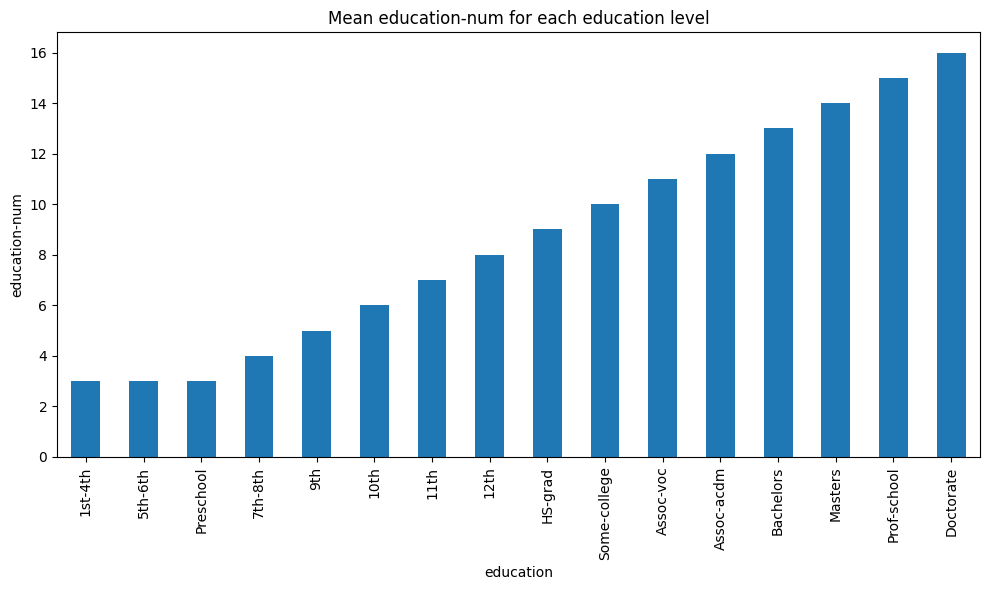

In [24]:
# check relationship between education and education-num using a barplot
plt.figure(figsize=(10, 6))

# calculate the average education-num for each education category and sort the results
edu_means = df.groupby('education')['education-num'].mean().sort_values()

edu_means.plot(kind='bar')
plt.title('Mean education-num for each education level')
plt.ylabel('education-num')
plt.xlabel('education')
plt.tight_layout()
plt.show()

^ Note: With the exception of preschool, 1st-4th, and 5th-6th, all the education categories map neatly to one education-num value. Thus, these two features are largely redundant, and we can drop one of the columns as a feature. I will choose to drop education (instead of education-num), since ordinal categorical data requires more preprocessing than ordinal numerical data.

In [25]:
# drop education
df.drop("education", axis=1, inplace=True)
categorical_features = categorical_features.drop("education")
df.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income_>50K'],
      dtype='object')

In [26]:
# check the number of unique values for each category to prepare for one-hot-encoding
df[categorical_features].nunique()

workclass          9
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
dtype: int64

In [27]:
# select the top 10 values of native-country, since 42 is too many to encode
top_10_country = df["native-country"].value_counts(sort=True, ascending=False).head(10).index
top_10_country

Index(['United-States', 'Mexico', 'missing', 'Philippines', 'Germany',
       'Canada', 'Puerto-Rico', 'El-Salvador', 'India', 'Cuba'],
      dtype='object')

In [28]:
# one-hot-encode each of the top 10 countries
for country in top_10_country:
    df["country_" + country] = np.where(df["native-country"] == country, 1, 0)

# drop the original country column
df.drop("native-country", axis=1, inplace=True)
categorical_features = categorical_features.drop("native-country")
df.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_>50K', 'country_United-States',
       'country_Mexico', 'country_missing', 'country_Philippines',
       'country_Germany', 'country_Canada', 'country_Puerto-Rico',
       'country_El-Salvador', 'country_India', 'country_Cuba'],
      dtype='object')

In [29]:
# check that one-hot-encoding worked
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,...,country_United-States,country_Mexico,country_missing,country_Philippines,country_Germany,country_Canada,country_Puerto-Rico,country_El-Salvador,country_India,country_Cuba
0,39.0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,...,1,0,0,0,0,0,0,0,0,0
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,...,1,0,0,0,0,0,0,0,0,0
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,...,1,0,0,0,0,0,0,0,0,0
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,...,1,0,0,0,0,0,0,0,0,0
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# one-hot-encode all remaining categorical values
for elem in categorical_features:
    df_encoded = pd.get_dummies(df[elem], prefix=elem, prefix_sep="_")
    df = df.join(df_encoded)

# check that one-hot-encoding worked
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Non-Female
0,39.0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,...,0,0,0,0,0,0,0,1,0,1
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,0,0,1,0,0,1,0,0,1,0


In [31]:
# remove original columns from dataframe
for elem in categorical_features:
    df.drop(elem, axis=1, inplace=True)

# check that one-hot-encoding worked
df.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_>50K', 'country_United-States',
       'country_Mexico', 'country_missing', 'country_Philippines',
       'country_Germany', 'country_Canada', 'country_Puerto-Rico',
       'country_El-Salvador', 'country_India', 'country_Cuba',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'workclass_missing', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handle

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Q1: Yes, I have a new feature list. I kept all the non-label columns, except:
    
-  "education": This is redundant with the "education-num" column and requires more preprocessing, since it is an ordinal categorical feature.
-  "fnlwgt" (final weight): This is a measure of how many people in the population are represented by that row. This feature seemed to have no predictive value on income, based on the boxplot showing near-identical distributions across the two label classes. 
    
  
Q2: So far, I have already preprocessed the data by:

- Replacing missing values: I imputed numerical values using the column mean and replaced categorical values with a "missing" category.
- Applying winsorization: I capped numerical features at the 1st and 99th percentiles to reduce the effect of outliers.
- Encoding the label: I converted the the label from a string (">50K" or "<=50K") to  binary format (1 for income >50K, 0 otherwise). This makes it easier to calculate metrics down the line.
- One-hot-encoding categorical features: This step is necessary for the decision tree to use categorical data. Note that for native-country, I only encoded the top 10 most frequent countries to reduce dimensionality.
    
In addition, I will apply the following steps to prepare the data for modeling: 

- Define the features (X) and the label (y)
- Split the data into a training set and test set (test_size 0.33), using statify=y to keep the proportion of each class label the same in each subset
- Note: Scaling the data is not necessary, since I will be using tree-based models (see Q3)

Q3: I plan to focus on tree-based models such as simple decision trees, random forests, and gradient-boosted decision trees. This is because they can handle both numerical and categorical features without extensive preprocessing, work well for binary classification tasks, and are more interpretable than models like Neural Networks. While KNN and logistic regression can also be applied to binary classification, they require feature scaling and can struggle to capture more complex nonlinear, relationships as well as tree-based models.
   
   
Q4: I will start by training a simple Decision Tree model and then extend to ensemble methods like Random Forests and Gradient-Boosted Decision Trees. For each of these three model types, I will conduct a grid search with 5-fold cross-validation to find the hyperparameters that result in the best validation performance. The hyperparameters I will choose to explore are as follows:
- Decision Tree: max_depth, min_samples_leaf, criterion
- Random Forest: max_depth, min_samples_leaf, criterion, n_estimators
- Gradient-Boosted Decision Trees: max_depth, min_samples_leaf, n_estimators, learning_rate

After the grid search, I will compare the validation accuracies of the best-performing configurations of each model (DT, RF, GBDT) to make my final selection. I will then fit the final model using the selected algorithm and hyperparameters. Additionally, I will explore with different thresholds on the validation data to find the threshold that results in the highest average of accuracy and F1-score. This is because I want the model to make as many correct predictions as possible (accuracy) while maintaining a reasonable balance between precision and recall (F1-score), especially since there is a class imbalance.

To evaluate generalization performance, I will evaluate the final model on the test set using the chosen threshold and calculate a range of metrics including accuracy, AUC, precision, recall, and F1-score. I will also generate a confusion matrix to inspect the types of classification errors the model makes (false positives vs false negatives). 

Finally, I will evaluate the fairness of the model by testing its performance across the two label classes, `>$50K` and `<=$50K`, paying close attention to precision and recall. I will also analyze the results across different protected groups, specifically for sex, race, and native country to check that the model does not disproportionately disadvantage any group.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [32]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import time

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [33]:
X = df.drop(["income_>50K"], axis=1)
y = df["income_>50K"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=15, 
                                                    stratify=y) # keep class proportions
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21815, 59)
(10746, 59)
(21815,)
(10746,)


### Model #1: Simple Decision Tree

In [35]:
# create a hyperparameter grid to test different hyperparameters of decision trees
dt_param_grid = {
    'max_depth': list(range(3, 51, 3)),
    'min_samples_leaf': list(range(1, 51, 3)),
    'criterion': ['gini', 'entropy']
}

dt_param_grid

{'max_depth': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48],
 'min_samples_leaf': [1,
  4,
  7,
  10,
  13,
  16,
  19,
  22,
  25,
  28,
  31,
  34,
  37,
  40,
  43,
  46,
  49],
 'criterion': ['gini', 'entropy']}

In [36]:
# use grid search to find the best model hyperparameters
dt_model = DecisionTreeClassifier(class_weight='balanced') # give more weight to minority class
dt_grid = GridSearchCV(dt_model, 
                       param_grid=dt_param_grid,
                       n_jobs=4, # parallelize by allowing 4 cores to be used - speeds up computation
                       verbose=1) # logging data

In [37]:
t0 = time.time()
dt_grid_search = dt_grid.fit(X_train, y_train)
t1 = time.time()
print(f"Elapsed time for DT grid search: {t1-t0:.2f}s")

Fitting 5 folds for each of 544 candidates, totalling 2720 fits
Elapsed time for DT grid search: 46.17s


In [38]:
# get the best accuracy and parameter values from the grid search
dt_accuracy = dt_grid.best_score_
print(f"Validation accuracy for the best DT model is : {dt_accuracy:.4f}")
dt_best_params = dt_grid.best_params_
print(f"DT model best parameters: {dt_best_params}") 

Validation accuracy for the best DT model is : 0.8207
DT model best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}


### Model #2: Random Forest

In [40]:
# create a hyperparameter grid to test different hyperparameters of random forests
rf_param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 300]
}

^ Note: In my original parameter ranges, I chose relatively higher max_depth values and lower min_samples_leaf values. This is intentional, as both allow for more complex, potentially overfitted individual trees that Random Forests can average out to reduce variance and improve generalization.

In [41]:
# use grid search to find the best model hyperparameters
rf_model = RandomForestClassifier(class_weight='balanced') # give more weight to minority class
rf_grid = GridSearchCV(rf_model, 
                       param_grid=rf_param_grid, 
                       n_jobs=4, # parallelize by allowing 4 cores to be used
                       verbose=1) # logging data

In [42]:
t0 = time.time()
rf_grid_search = rf_grid.fit(X_train, y_train)
t1 = time.time()
print(f"Elapsed time for RF grid search: {t1-t0:.2f}s")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Elapsed time for RF grid search: 157.35s


In [43]:
rf_accuracy = rf_grid.best_score_
print(f"Validation accuracy for the best RF model is : {rf_accuracy:.4f}")
rf_best_params = rf_grid.best_params_
print(f"RF model best parameters: {rf_best_params}") 

Validation accuracy for the best RF model is : 0.8464
RF model best parameters: {'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 1, 'n_estimators': 300}


^ Note: Since both the best values for max_depth and n_estimators are at the end of the range I provided during the grid search, let's do another grid search with higher values (and the chosen values for the other hyperparameters).

In [63]:
rf_param_grid_2 = {
    'max_depth': [40, 50, 60], # adjusted higher
    'n_estimators': [300, 400, 500, 600] # adjusted higher
}

In [64]:
# use grid search to find the best model hyperparameters
rf_model_2 = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, class_weight='balanced')
rf_grid_2 = GridSearchCV(rf_model_2, 
                       param_grid=rf_param_grid_2, 
                       n_jobs=4, # parallelize by allowing 4 cores to be used
                       verbose=1) # logging data

In [65]:
t0 = time.time()
rf_grid_search_2 = rf_grid_2.fit(X_train, y_train)
t1 = time.time()
print(f"Elapsed time for RF grid search 2: {t1-t0:.2f}s")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Elapsed time for RF grid search 2: 105.74s


In [66]:
rf_accuracy_2 = rf_grid_2.best_score_
print(f"Validation accuracy for the best RF model is : {rf_accuracy_2:.4f}")
rf_best_params_2 = rf_grid_2.best_params_
print(f"RF model 2 best parameters: {rf_best_params_2}") 

Validation accuracy for the best RF model is : 0.8464
RF model 2 best parameters: {'max_depth': 50, 'n_estimators': 300}


^ Note: This accuracy is the same as above, with a different max_depth value. Let's just choose max_depth = 50.

### Model #3: Gradient-Boosted Decision Tree

In [67]:
gbdt_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1], 
    'max_depth': [1, 5, 10],
    'min_samples_leaf': [10, 20, 30],
    'n_estimators': [100, 300]
}

^ Note: for GBDT, I began with lower max_depth values and higher min_samples_leaf values, since GBDTs are less tolerant to overfitted trees than RFs. This is because each tree builds on the errors of the previous ones, causing the errors to possibly compound.

In [68]:
gbdt_model = GradientBoostingClassifier(n_iter_no_change=10, # enables early stopping if no improvement in validation loss for 10 iterations — saves time and resources
                                        validation_fraction=0.15) # fraction of training data used as validation set for early stopping
gbdt_grid = GridSearchCV(gbdt_model, 
                         param_grid=gbdt_param_grid,
                         n_jobs=4, # parallelize by allowing 4 cores to be used
                         verbose=1) # logging data

In [70]:
# note: GradientBoostingClassifier does not have an inherent class_weights hyperparameter, so we must incormorate it into the fitting 
# process instead
from sklearn.utils.class_weight import compute_sample_weight 
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

In [71]:
t0 = time.time()
gbdt_grid_search = gbdt_grid.fit(X_train, y_train, sample_weight=sample_weights)
t1 = time.time()
print(f"Elapsed time for GBDT grid search: {t1-t0:.2f}s")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Elapsed time for GBDT grid search: 253.26s


In [72]:
gbdt_accuracy = gbdt_grid.best_score_
print(f"Validation accuracy for the best GBDT model is : {gbdt_accuracy:.4f}")
gbdt_best_params = gbdt_grid.best_params_
print(f"GBDT model best parameters: {gbdt_best_params}") 

Validation accuracy for the best GBDT model is : 0.8345
GBDT model best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 300}


^ Note: again, since all the chosen parameter values are on the edge of the range, let's adjust the ranges and do another grid search.

In [73]:
gbdt_param_grid_2 = {
    'learning_rate': [0.1, 0.2], # adjusted higher
    'max_depth': [10, 20, 30, 40], # adjusted higher
    'min_samples_leaf': [1, 5, 10], # adjusted lower
    'n_estimators': [300, 400, 500] # adjusted higher
}

In [74]:
gbdt_model_2 = GradientBoostingClassifier(n_iter_no_change=10, # for early stopping
                                          validation_fraction=0.15) # for early stopping)
gbdt_grid_2 = GridSearchCV(gbdt_model_2, 
                         param_grid=gbdt_param_grid_2,
                         n_jobs=6, # parallelize by allowing 6 cores to be used
                         verbose=1) # logging data

In [75]:
t0 = time.time()
gbdt_grid_search_2 = gbdt_grid_2.fit(X_train, y_train, sample_weight=sample_weights)
t1 = time.time()
print(f"Elapsed time for GBDT grid search 2: {t1-t0:.2f}s")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Elapsed time for GBDT grid search 2: 226.06s


In [76]:
gbdt_accuracy_2 = gbdt_grid_2.best_score_
print(f"Validation accuracy for the best GBDT model 2 is : {gbdt_accuracy_2:.4f}")
gbdt_best_params_2 = gbdt_grid_2.best_params_
print(f"GBDT model best parameters: {gbdt_best_params_2}") 

Validation accuracy for the best GBDT model 2 is : 0.8374
GBDT model best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 400}


^ Note: This accuracy is higher than the one from the original GBDT grid search, so let's count these parameters as the best for GBDT instead.

### Select and Train the Best Model

From the work above, the best validation accuracies of each model are as follows:
- DT: 0.8207 (criterion=gini, max_depth=3, min_samples_leaf=1)
- RF: 0.8464 (criterion=entropy, max_depth=50, min_samples_leaf=1, n_estimators=300)
- GBDT: 0.8374 (learning_rate=0.1, max_depth=10, min_samples_leaf=5, n_estimators=400)
  
Since RF gave us the highest validation accuacy, we will select RF with the specified parameters as our final model.

In [77]:
# train an RF model with the best hyperparameters from the grid search
best_model = RandomForestClassifier(max_depth=rf_best_params_2['max_depth'],
                                    min_samples_leaf=rf_best_params['min_samples_leaf'],
                                    criterion=rf_best_params['criterion'],
                                    n_estimators=rf_best_params['n_estimators'],
                                    class_weight='balanced')

best_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, n_estimators=300)

Now, let's find an ideal threshold for the model to use. Note that we must do threshold tuning on validation data, not the test data, since this is still a part of model selection. Evaluating performance at different thresholds using the test data would be considered "cheating" or "peeking" at the data.

In [78]:
# calculate probability predictions on cross-validation data for threshold tuning
y_proba_cv = cross_val_predict(best_model, X_train, y_train, cv=5, 
                               method='predict_proba', n_jobs=4)[:, 1]

In [93]:
# explore with different thresholds on the validation data
accuracies = []
f1_scores = []

# tune thresholds on these CV predictions
thresholds = np.arange(0.1, 1, 0.05) # from 0.1 to 0.9 is increments of 0.05
for t in thresholds:
    y_pred = (y_proba_cv >= t).astype(int)
    acc = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred, zero_division=0)
    prec = precision_score(y_train, y_pred, zero_division=0)
    rec = recall_score(y_train, y_pred, zero_division=0)

    accuracies.append(acc)
    f1_scores.append(f1)
    
    print(f"Threshold: {t:.2f} | Accuracy: {acc:.4f} | F1-Score: {f1:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f}")

acc_f1_avg = list(np.array(accuracies) + np.array(f1_scores) / 2)

best_th_acc = thresholds[accuracies.index(max(accuracies))]
best_th_f1 = thresholds[f1_scores.index(max(f1_scores))]
best_th_avg = thresholds[acc_f1_avg.index(max(acc_f1_avg))]

print(f"\nBest Threshold Based on Accuracy: {best_th_acc:.2f}")
print(f"Best Threshold Based on F1: {best_th_f1:.2f}")
print(f"Best Threshold Based on Avg of Accuracy and F1: {best_th_avg:.2f}")

Threshold: 0.10 | Accuracy: 0.7371 | F1-Score: 0.6268 | Precision: 0.4762 | Recall: 0.9170
Threshold: 0.15 | Accuracy: 0.7728 | F1-Score: 0.6507 | Precision: 0.5166 | Recall: 0.8789
Threshold: 0.20 | Accuracy: 0.7968 | F1-Score: 0.6675 | Precision: 0.5508 | Recall: 0.8468
Threshold: 0.25 | Accuracy: 0.8134 | F1-Score: 0.6774 | Precision: 0.5803 | Recall: 0.8134
Threshold: 0.30 | Accuracy: 0.8238 | F1-Score: 0.6784 | Precision: 0.6053 | Recall: 0.7716
Threshold: 0.35 | Accuracy: 0.8319 | F1-Score: 0.6777 | Precision: 0.6293 | Recall: 0.7341
Threshold: 0.40 | Accuracy: 0.8393 | F1-Score: 0.6779 | Precision: 0.6552 | Recall: 0.7023
Threshold: 0.45 | Accuracy: 0.8420 | F1-Score: 0.6707 | Precision: 0.6734 | Recall: 0.6680
Threshold: 0.50 | Accuracy: 0.8458 | F1-Score: 0.6637 | Precision: 0.6988 | Recall: 0.6320
Threshold: 0.55 | Accuracy: 0.8480 | F1-Score: 0.6550 | Precision: 0.7222 | Recall: 0.5993
Threshold: 0.60 | Accuracy: 0.8473 | F1-Score: 0.6390 | Precision: 0.7418 | Recall: 0.5612

^ Note: Based on these metrics, a threshold can be chosen depending on the business goals of the model. For example, if the goal is to predict high-income customers to distribute ads for an expensive product, a company may choose to prioritize higher precision to avoid wasting ad costs (which can happen if we falsely predict a low-income customer as high-income), whereas another might prioritize higher recall to maximize the number of potential high-income customers they reach. In our case, since there is no particular business goal in mind, we will use a threshold of 0.4, which provides reasonable balance across accuracy and F1-Score (which takes both precision and recall into account).

### Evaluate the Final Model on Test Data

#### Evaluate Overall Metrics

In [100]:
prob_predictions = best_model.predict_proba(X_test)[:, 1]
class_label_predictions = (prob_predictions > 0.4).astype(int)

accuracy = accuracy_score(y_test, class_label_predictions)
precision = precision_score(y_test, class_label_predictions)
recall = recall_score(y_test, class_label_predictions)
f1 = f1_score(y_test, class_label_predictions)
auc = roc_auc_score(y_test, prob_predictions)

print(f'Test Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC: {auc}')

Test Accuracy: 0.837893169551461
Precision: 0.65
Recall: 0.7082689335394127
F1 Score: 0.6778846153846154
AUC: 0.8966084438218446


^ Note: The model performs relatively well, with a decent test accuracy of ~0.84 and a high AUC of ~0.90. Precision is slightly lower at 0.65, while recall is slightly higher at 0.71. This suggests that this particular model is more liberal when predicting positive cases, working better in scenarios where missing positive instances is more costly than false positives.

#### Evaluate Metrics Across Each Label Class

In [101]:
# confusion matrix
cm = confusion_matrix(y_test, class_label_predictions, labels=[True, False])
pd.DataFrame(cm, 
             columns=['Predicted: >50K', 'Predicted: <=50K'],
             index=['Actual: >50K', 'Predicted: <=50K']
)

,Predicted: >50K,Predicted: <=50K
Actual: >50K,1833,755
Predicted: <=50K,987,7171


In [102]:
# use confusion matrix to calculate accuracy for >50K class:
pos_accuracy = 1833 / (1833 + 755)
neg_accuracy = 7171 / (987 + 7171)
print(f"Accuracy for >50K class: {pos_accuracy:.4f}")
print(f"Accuracy for <=50K class: {neg_accuracy:.4f}")

Accuracy for >50K class: 0.7083
Accuracy for <=50K class: 0.8790


^ Note: Based on the class-wise accuracies (0.7083 for `>$50K` vs. 0.8790 for `<=$50K`), it seems that the model does significantly better on the majority group (<=50K), despite already addressing class imbalance by weighing the minority class more (using class_weight='balanced'). Note that I've also tried resampling using SMOTE but removed it since it made little to no difference (it actually got a tad bit worse). If we wanted to further prioritize balanced accuracy across groups, choosing the threshold that results in the best F1-score (threshold=0.3) would likely improve performance on the minority class. However, it is very likely that this would come with the tradeoff of reduced overall accuracy. Again, the choice depends on the business goals. For now, we will keep the threshold as 0.4.

#### Evaluate Metrics Across Protected Groups - Sex, Race, Nationality

In [114]:
# function to print metrics across different subgroups
def print_metrics(groups):
    for group in groups:
        # create mask to filter for the rows that match that subgroup
        mask = X_test[group] == 1
        y_true_group = y_test[mask]
        y_pred_group = class_label_predictions[mask]
        
        # calculate metrics for this subgroup
        acc = accuracy_score(y_true_group, y_pred_group)
        prec = precision_score(y_true_group, y_pred_group)
        rec = recall_score(y_true_group, y_pred_group)
        f1 = f1_score(y_true_group, y_pred_group)
        auc = roc_auc_score(y_true_group, y_pred_group)
    
        print(f"Results for {group}")
        print(f"Accuracy: {acc:.3f}")
        print(f"Precision: {prec:.3f}")
        print(f"Recall: {rec:.3f}")
        print(f"F1-Score: {f1:.3f}")
        print(f"AUC: {auc:.3f}\n")

In [115]:
# filter for sex categories
sex_groups= ['sex_Female', 'sex_Non-Female']
print_metrics(sex_groups)

Results for sex_Female
Accuracy: 0.925
Precision: 0.656
Recall: 0.637
F1-Score: 0.646
AUC: 0.798

Results for sex_Non-Female
Accuracy: 0.796
Precision: 0.649
Recall: 0.720
F1-Score: 0.683
AUC: 0.775



^ Note: Interestingly, the model seems to perform better in terms of both accuracy and AUC on the minority class (females) despite lower precision and recall compared to the non-female class. This suggests that the model is generally good at distinguishing classes for females, but it might still struggle to correctly identify positive cases, possibly due to imbalances in the data.

In [116]:
# filter for race categories
race_groups = ['race_Amer-Indian-Inuit', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White']
print_metrics(race_groups)

Results for race_Amer-Indian-Inuit
Accuracy: 0.898
Precision: 0.429
Recall: 0.333
F1-Score: 0.375
AUC: 0.644

Results for race_Asian-Pac-Islander
Accuracy: 0.827
Precision: 0.673
Recall: 0.742
F1-Score: 0.706
AUC: 0.801

Results for race_Black
Accuracy: 0.913
Precision: 0.647
Recall: 0.682
F1-Score: 0.664
AUC: 0.814

Results for race_Other
Accuracy: 0.940
Precision: 0.750
Recall: 0.667
F1-Score: 0.706
AUC: 0.820

Results for race_White
Accuracy: 0.828
Precision: 0.649
Recall: 0.710
F1-Score: 0.678
AUC: 0.789



^ Note: The model performs well for most racial groups, with relatively high and consistent accuracy and AUC scores (around or above 0.8.) However, there seems to be a trend where precision and recall are noticeably lower (around 0.6 or 0.7). The Amer-Indian-Inuit group is the most obvious case of this, with noticeably low precision (0.43), recall (0.33), and AUC (0.64), despite high accuracy (0.898). This may be due to underrepresentation of subgroups like the Amer-Indian-Inuits in the training data and/or highly imbalanced income distributions within these groups in general.

In [117]:
# filter for country categories
country_groups = ['country_United-States', 'country_Mexico', 'country_missing', 'country_Philippines', 'country_Germany', 'country_Canada',
                   'country_Puerto-Rico', 'country_El-Salvador', 'country_India', 'country_Cuba']
print_metrics(country_groups)

Results for country_United-States
Accuracy: 0.833
Precision: 0.646
Recall: 0.705
F1-Score: 0.674
AUC: 0.790

Results for country_Mexico
Accuracy: 0.969
Precision: 0.500
Recall: 0.667
F1-Score: 0.571
AUC: 0.823

Results for country_missing
Accuracy: 0.845
Precision: 0.731
Recall: 0.691
F1-Score: 0.710
AUC: 0.797

Results for country_Philippines
Accuracy: 0.908
Precision: 0.889
Recall: 0.800
F1-Score: 0.842
AUC: 0.878

Results for country_Germany
Accuracy: 0.818
Precision: 0.667
Recall: 0.667
F1-Score: 0.667
AUC: 0.771

Results for country_Canada
Accuracy: 0.854
Precision: 0.800
Recall: 0.800
F1-Score: 0.800
AUC: 0.842

Results for country_Puerto-Rico
Accuracy: 0.906
Precision: 0.400
Recall: 1.000
F1-Score: 0.571
AUC: 0.950

Results for country_El-Salvador
Accuracy: 0.939
Precision: 0.000
Recall: 0.000
F1-Score: 0.000
AUC: 0.484

Results for country_India
Accuracy: 0.838
Precision: 0.706
Recall: 0.923
F1-Score: 0.800
AUC: 0.857

Results for country_Cuba
Accuracy: 1.000
Precision: 1.000
R

^ Note: The model performs well on countries like the Philippines, Canada, India, and Cuba, showing relatively high and consistent metrics (although with Cuba, this is likely affected by the small sample size). Performance on the U.S. is solid but less high, while results for Mexico, Puerto Rico, and Germany are more mixed. One interesting result is El Salvador, where the accuracy is 0.939, but the AUC is 0.484, and the precision, recall, and F1 scores are all 0. Let's take a look at the actual and predicted labels to get a better idea of what's going on:

In [123]:
m = X_test['country_El-Salvador'] == 1
y_true = y_test[m]
y_pred = class_label_predictions[m]
print(y_true.values)
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


This outcome makes sense given that the vast majority of the actual labels are 0s. The model misclassified the only positive case as negative and the only negative case as positive, which is why precision, recall, and F1-score are all 0 despite having a high overall accuracy. It’s likely the model has learned that originally being from El Salvador strongly signals an income of <=50K. This result may be perpetuating harmful sterotypes due to biased data, or it could be reflecting real underlying socioeconomic patterns (that stem from systemic discrimination). Seeing as there's only 33 examples in this subgroup, more representative examples from individuals from El Salvador are needed to help the model reduce bias and learn more meaningful patterns in distinguishing classes. Looking back at the results from the Amer-Indian-Inuit subgroup in the previous race analysis, it is likely that that those results may stem from similar causes as the El Salvador results.

Final Analysis: The model shows solid overall performance with relatively good accuracy `(~0.84)` and AUC `(~0.90)`, indicating effective discrimination between classes. However, I was unable to achieve balanced accuracy across the classes without sacrificing overall accuracy, despite weighing and resampling efforts. Additionally, some demographic subgroups show notably lower precision and recall, which may reflect limitations in model learning due to limited and biased data or genuinely skewed income distributions within those groups. To better understand and potentially mitigate these issues, collecting more representative data from underrepresented subgroups is necessary to ensure fair AI.